<a href="https://colab.research.google.com/github/LaxmanBusetty/Machine_Learning/blob/main/stock_price_prediction_using_KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn




In [ ]:
pip install quandl


In [ ]:
import quandl

In [ ]:
data= quandl.get('NSE/TATAGLOBAL')

In [ ]:
data2=quandl.get('NSE/TATAMOTORS')


In [ ]:
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
...,...,...,...,...,...,...,...
2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31


In [ ]:
data2

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2003-12-26,435.80,440.50,431.65,438.85,438.60,1534637.0,6714.66
2003-12-29,441.00,449.70,441.00,448.40,447.80,2125952.0,9497.72
2003-12-30,450.00,451.90,430.10,444.85,442.40,2683293.0,11894.85
2003-12-31,446.00,459.30,443.55,452.10,452.05,4311596.0,19551.42
2004-01-01,453.25,457.90,451.50,454.00,454.45,2077604.0,9457.51
...,...,...,...,...,...,...,...
2018-12-31,172.45,173.90,171.75,173.05,172.70,8511388.0,14707.36
2019-01-01,173.50,174.20,171.30,174.00,173.45,6715543.0,11598.67
2019-01-02,170.60,171.75,168.00,168.40,168.55,13410104.0,22776.69


In [ ]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


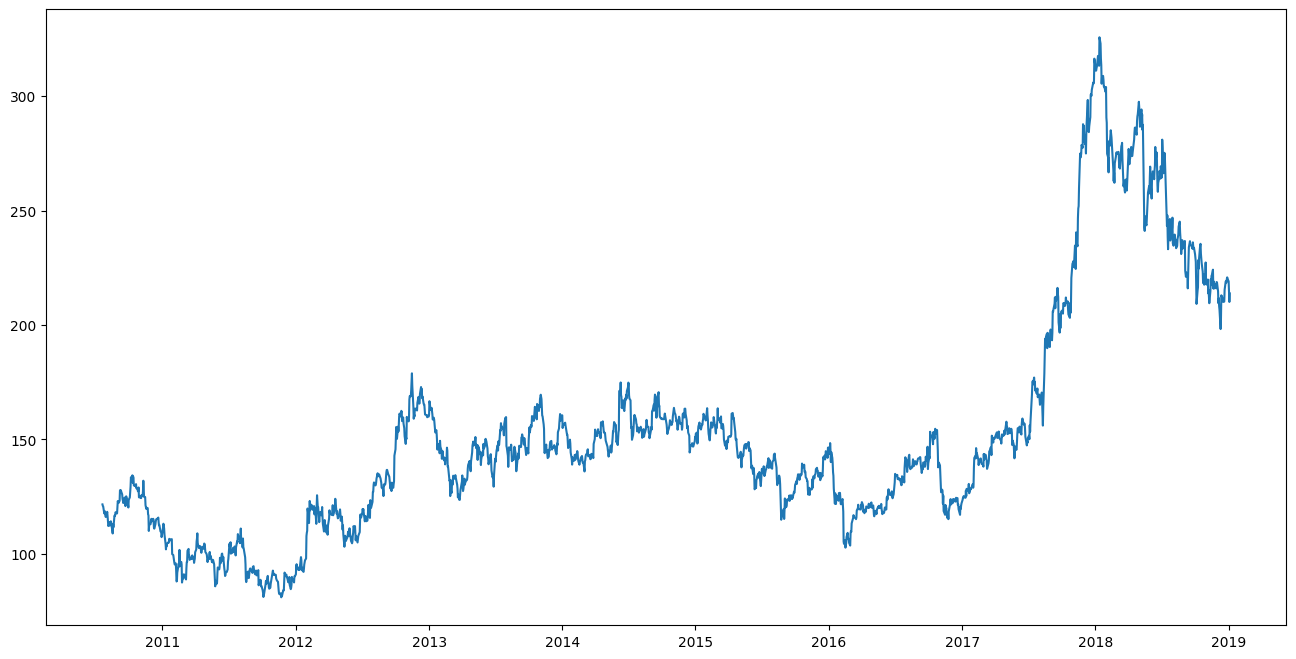

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='Closing Price')







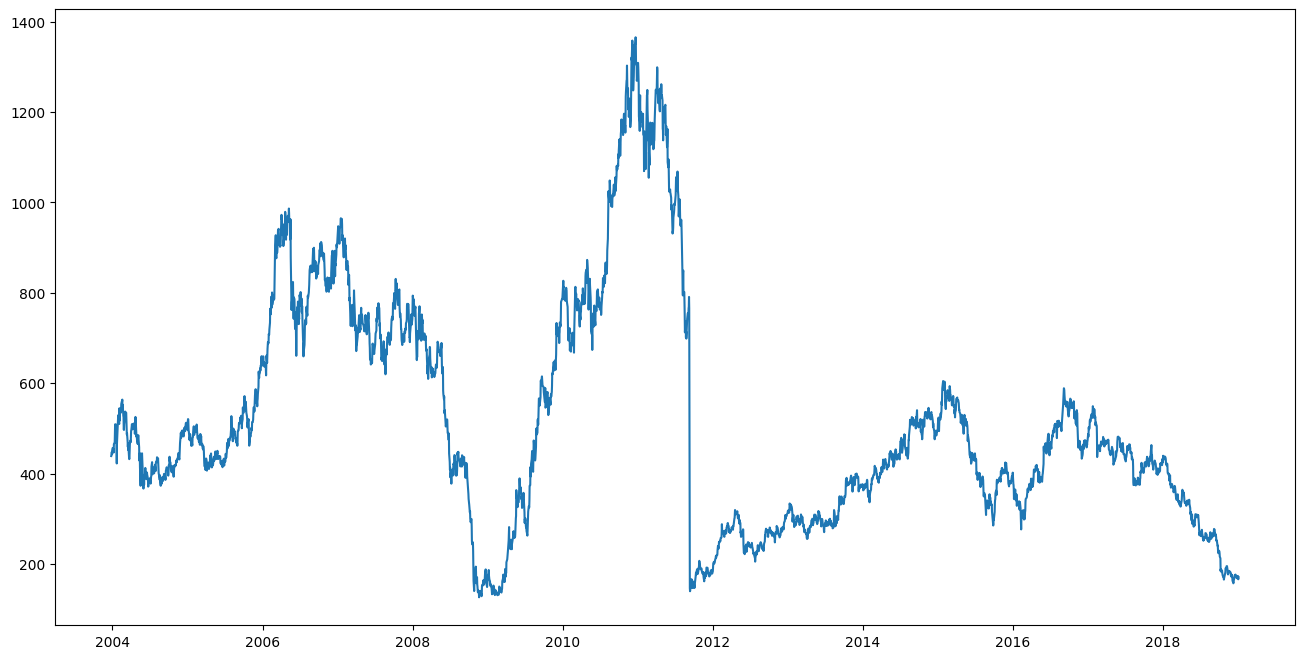

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data2['Close'],label='Closing Price')

In [ ]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data=data.dropna()

In [ ]:
x=data[['Open - Close','High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [ ]:
y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [ ]:
y

array([-1, -1, -1, ..., -1,  1, -1])

In [ ]:
y2=np.where(data2['Close'].shift(-1)>data2['Close'],1,-1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

Implementation of KNN classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using grid search to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)
#Fit the model
model.fit(x_train,y_train)

#Accuracy score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)





Train_data Accuracy: 0.68
Test_data Accuracy: 0.51


In [ ]:
predictions_classification=model.predict(x_test)

In [ ]:
actual_predicted_data= pd.DataFrame({'Actual Class': y_test, 'predicted Class':predictions_classification})

In [ ]:
actual_predicted_data.head(10)

,Actual Class,predicted Class
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
5,-1,-1
6,-1,1
7,-1,-1
8,-1,1
9,1,-1


In [ ]:
y=data['Close']

Implementation of KNN Regression


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(x,y, test_size=0.25,random_state=44)


#using grid search to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg,params,cv=5)
#Fit the model
model_reg.fit(x_train_reg,y_train_reg)
predictions= model_reg.predict(x_test_reg)


In [ ]:
print(predictions)

[111.27       142.19       138.59666667 150.4        186.53
 135.12333333 151.13666667 141.71333333 118.66333333 144.59333333
 160.44333333 140.72       156.5        207.73666667 132.97
 207.62       111.35333333 134.16       132.28666667 138.60666667
 161.86666667 131.26       121.99333333 135.12333333 164.45666667
 216.39       135.43666667 137.07       162.64       128.51
 141.51333333 129.99666667 152.64666667 134.33333333 196.32333333
 120.84333333 156.49333333 157.4        145.47       132.08333333
 122.75666667 128.77       130.84333333 159.17666667 167.54666667
 168.98       189.31333333 184.33       187.08333333 130.23666667
 141.33333333 136.24       130.08       162.26333333 152.51333333
 124.14       134.20333333 139.87666667 113.61666667 137.07
 136.69       120.16666667 205.71333333 122.48333333 141.50666667
 136.37666667 114.93       132.82666667 181.68       125.15666667
 136.37666667 211.39333333 174.05333333 162.33333333 131.89666667
 131.15666667 124.06       134.61 

In [ ]:
#rmse
rms= np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

150.68555384918616

In [ ]:
valid=pd.DataFrame({'Actual Close':y_test_reg, 'predicted close value':predictions})

In [ ]:
valid.head(10)

,Actual Close,predicted close value
Date,,
2015-03-17,156.70,111.270000
2015-09-07,120.45,142.190000
2013-02-18,141.90,138.596667
2013-07-05,145.15,150.400000
2018-03-15,279.60,186.530000
2017-01-19,130.50,135.123333
2013-11-26,145.50,151.136667
2012-12-17,165.65,141.713333
2016-07-11,133.10,118.663333


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Initialize Parameters

In [ ]:
m, n = x_train.shape
theta=np.zeros(n)
alpha=0.01 # Learning rate
iterations=1000

Gradient Descent Function:

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= alpha * gradient
    return theta

theta = gradient_descent(x_train, y_train, theta, alpha, iterations)


Model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = x_test.dot(theta)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.0005976537237373


In [ ]:
rms= np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rms

1.0002987822264593

By changing the model from KNN regression to Gradient descent the rms value has drastically chances from 150 to 1

Importing libraries for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


training random forest model

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

predict and evaluate

In [ ]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_


In [ ]:
y_pred_tuned = best_rf.predict(x_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f'Tuned Mean Squared Error: {mse_tuned}')


Tuned Mean Squared Error: 1.0439639481671263


In [ ]:
rms= np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred_tuned)),2)))
rms

1.0217455398322648